# 1. 데이터 로드 및 확인

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/DL/개인공부/jena_climate'

Mounted at /content/drive/


In [ ]:
import os

fname = os.path.join(path, 'jena_climate_2009_2016.csv')
f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


- 420,451 x 15 크기의 데이터
- 420,451개의 타임스텝
- 1개의 날짜 변수(Date Time)와 14개의 날씨 정보 변수

In [ ]:
# 데이터 프레임으로 출력하여 확인해보기
import pandas as pd

df = pd.read_csv(fname)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
# 결측치 확인
df.isna().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [ ]:
# 변수 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420451 non-null  object 
 1   p (mbar)         420451 non-null  float64
 2   T (degC)         420451 non-null  float64
 3   Tpot (K)         420451 non-null  float64
 4   Tdew (degC)      420451 non-null  float64
 5   rh (%)           420451 non-null  float64
 6   VPmax (mbar)     420451 non-null  float64
 7   VPact (mbar)     420451 non-null  float64
 8   VPdef (mbar)     420451 non-null  float64
 9   sh (g/kg)        420451 non-null  float64
 10  H2OC (mmol/mol)  420451 non-null  float64
 11  rho (g/m**3)     420451 non-null  float64
 12  wv (m/s)         420451 non-null  float64
 13  max. wv (m/s)    420451 non-null  float64
 14  wd (deg)         420451 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [ ]:
example_line = lines[0]
print(example_line)

example_split = example_line.split(',')[1:]
print(example_split)

example_dtype = type(example_split[0])
print(example_dtype)

01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
['996.52', '-8.02', '265.40', '-8.90', '93.30', '3.33', '3.11', '0.22', '1.94', '3.12', '1307.75', '1.03', '1.75', '152.30']
<class 'str'>


데이터를 Numpy array로 변환하기 위해 해야할 일
1. 한 line 씩 읽어 날씨 정보에 해당하는 값인 1번 인덱스부터 끝까지 추출
2. 날씨 정보가 원래 float 형이나 현재 str 형이므로 float 값으로 변환
3. float형 날씨 정보로 구성되어있으며 크기는 14인 리스트를 420,451개 만들어 numpy array로 저장

In [ ]:
# 전체 데이터를 numpy array로 변환
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))  # 420,451개의 행 x 14개의 날씨 정보 변수
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [ ]:
# 변환된 데이터 확인
print(f"한 line당 크기: {len(float_data[0])}")
print(f"numpy array 변환 전 값: {lines[0].split(',')[1:]}")
print(f"numpy array 변환 후 값: {[np.round(i, 2) for i in float_data[0]]}")

한 line당 크기: 14
numpy array 변환 전 값: ['996.52', '-8.02', '265.40', '-8.90', '93.30', '3.33', '3.11', '0.22', '1.94', '3.12', '1307.75', '1.03', '1.75', '152.30']
numpy array 변환 후 값: [996.52, -8.02, 265.4, -8.9, 93.3, 3.33, 3.11, 0.22, 1.94, 3.12, 1307.75, 1.03, 1.75, 152.3]


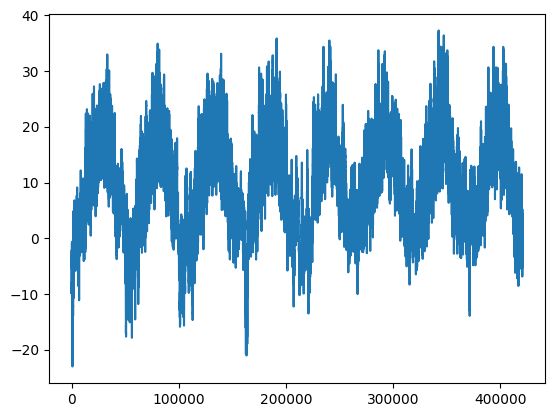

In [ ]:
# 시계열 온도 그래프 그리기
import matplotlib.pyplot as plt

temp = float_data[:, 1] # 1번 컬럼이 섭씨 온도 값
plt.plot(range(len(temp)), temp)
plt.show()

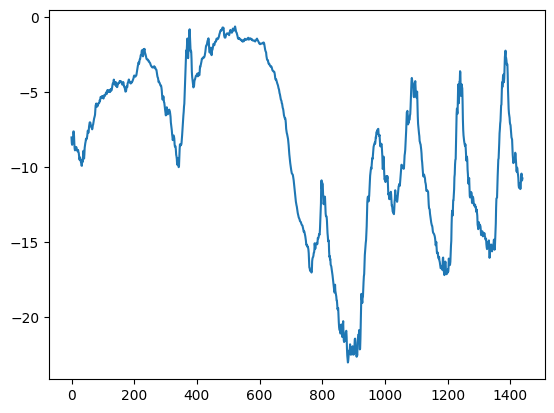

In [ ]:
# 10일 간 온도 그래프
plt.plot(range(1440), temp[:1440]) # 하나의 행은 10분 단위의 값. 따라서 하루는 24 * 6 = 144행 씩. 144행이 10개, 즉 1440개의 행은 10일간의 기록
plt.show()

- 10일 모두 영하의 온도
- 4일부터 온도가 급격히 떨어지고 6일차에 최저 온도를 찍고는 다시 올라 영하 5도 ~ 영하 17도 부근을 왔다갔다 함.

지난 몇 달간 데이터를 사용하여 다음 달의 평균 온도를 예측하는 것은 쉬운 편! 하지만 하루하루 데이터를 살펴보면 온도 변화가 매우 불안정.

일자별 수준의 시계열 데이터를 예측할 수 있을까?

# 2. 데이터 전처리

시계열 예측을 위한 데이터 전처리
- lookback: 10일 전 (1440행 전)
- steps: 6 (1시간마다 데이터 포인트 샘플링)
- delay: 144 (24시간 후 데이터가 target)

필요한 두 가지 작업
- 신경망에 주입할 수 있는 형태로 데이터 전처리하기.
    - 데이터가 이미 수치형이므로 추가적인 벡터화는 필요하지 않으나 각 시계열 특성의 범위가 다르므로 "정규화"하기
- float_data 배열을 받아 과거 데이터의 배치와 미래 타깃 온도를 추출하는 generator 함수 만들기.
    - 데이터가 10분 간의 타임스텝으로 이루어져 있으므로 중복이 많다. --> 모든 샘플을 각기 메모리에 저장하는 것은 낭비가 심하므로 대신 원본 데이터를 사용하여 그때그때 배치를 만들기.

In [ ]:
# 정규화
# 정규화 방식: (x - mean) / std
# train : valid : test = 200,000 : 100,000 : 120,451
mean = float_data[:200000].mean(axis=0)
float_data = float_data - mean
std = float_data[:200000].std(axis=0)
float_data = float_data / std

In [ ]:
'''generator
    반환: (samples, targets)
        - (x, y) 튜플
        - 반복적 반환을 위해 return 아닌 yield
    매개변수
        - data: 정규화한 부동 소수 데이터로 이루어진 원본 배열
        - lookback: 거슬러 올라갈 타임스텝
        - delay: target으로 사용할 미래 타임스텝
        - min_index, max_index: 추출할 타임스텝의 범위를 지정하기 위한 data 배열 인덱스. 검증 데이터와 테스트 데이터 분리에 사용
        - shuffle: 샘플을 섞을지, 시간 순서대로 추출할 지 결정
        - batch_size: 배치의 샘플 수
        - step: 데이터를 샘플링할 타임스텝 간격. 1시간에 하나의 데이터 포인트를 추출하기 위해 6으로 지정
'''

def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [ ]:
# train, validation, test generator
lookback = 1440
step = 6
delay = 144
batch_size = 128
train_gen = generator(float_data, lookback, delay, 0, 200000, shuffle=True)
val_gen = generator(float_data, lookback, delay, 200001, 300000)
test_gen = generator(float_data, lookback, delay, 300001, None)

val_steps = (300000 - 200001 - lookback) // batch_size # validation data를 순회하기 위해 val_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size # test data를 순회하기 위해 test_gen에서 추출할 횟수

# 3. 기준점

시계열 온도 데이터는 연속성이 있고 일자별로 주기성을 가진다고 볼 수 있다. (사실 이 데이터는 모델링하기 좋게 만들어진 데이터긴 하지만,  실제로는 데이터를 열어서 그래프를 그려보며 확인할 필요성이 있다. 이것도 GRU를 사용하여 모델링할 때 확인해보겠다.)
따라서 상식 수준의 기준점은 현재와 24시간 후 온도는 동일하다고 예측을 하는 것이다. 이 방법을 Mean Absolute Error(수치 예측 평가 기준)로 평가해보겠다.

### **적어도 현재와 24시간 후 온도가 동일하다고 예측한 MAE 보다는 딥러닝 모델을 이용한 예측 MAE가 더 낮아야 의미가 있다!**

In [ ]:
# Mean Absolute Error 계산
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    res = np.mean(batch_maes)
    return res

In [ ]:
standard_mae = evaluate_naive_method()
print(standard_mae)

0.2897359729905486


In [ ]:
# 섭씨 온도 기준 계산: mae * 표준 편차
print(standard_mae * std[1])

2.564887434980494


온도 오차가 섭씨 2.56도 정도 나 오차가 상당히 크다.

# 4. Dropout을 사용하여 과대적합을 감소시킨 GRU

과대적합을 해결하기 위해 Dropout 기법을 사용할 수 있다. 하지만 RNN에 Dropout을 올바르게 적용하는 방법은 간단하지 않다. 오랫동안 recurrent layer 이전에 Dropout을 적용하면 규제에 도움이 되기보다 학습에 방해가 되는 것으로 알려졌었다.

2015년 Yarin Gal의 "Uncertainty in Deep Learning"에 따르면, 타임스텝마다 랜덤하게 Dropout mask를 바꾸는 것이 아닌 동일한 Dropout mask(동일한 유닛의 Drop pattern)를 모든 타임스텝에 적용해야 한다.

GRU나 LSTM 같은 recurrent gate에 의해 만들어지는 표현을 규제하려면 recurrent layer 내부 계산에 사용된 activation function에 타임스텝마다 동일한 Dropout mask를 적용해야 한다. 모든 타임스텝에 동일한 Dropout mask를 적용하면 네트워크가 학습 오차를 타임스텝에 걸쳐 적절하게 전파시킬 것이다. 이와 반대로 타임스텝마다 랜덤한 Dropout mask를 적용하면 오차 신호가 전파되는 것을 방해하고 학습 과정에 해를 끼친다.

In [ ]:
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import RMSprop

clear_session()
model = Sequential()
model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, float_data.shape[-1])))
model.add(Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
hist = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/40


<ipython-input-18-83ab2a8df642>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)


500/500 [==============================] - 344s 680ms/step - loss: 0.3236 - val_loss: 0.2793
Epoch 2/40
500/500 [==============================] - 340s 680ms/step - loss: 0.3074 - val_loss: 0.2748
Epoch 3/40
500/500 [==============================] - 333s 666ms/step - loss: 0.3024 - val_loss: 0.2713
Epoch 4/40
500/500 [==============================] - 333s 665ms/step - loss: 0.2951 - val_loss: 0.2727
Epoch 5/40
500/500 [==============================] - 333s 665ms/step - loss: 0.2892 - val_loss: 0.2686
Epoch 6/40
500/500 [==============================] - 332s 665ms/step - loss: 0.2859 - val_loss: 0.2718
Epoch 7/40
500/500 [==============================] - 333s 666ms/step - loss: 0.2828 - val_loss: 0.2678
Epoch 8/40
500/500 [==============================] - 333s 666ms/step - loss: 0.2804 - val_loss: 0.2672
Epoch 9/40
500/500 [==============================] - 334s 669ms/step - loss: 0.2779 - val_loss: 0.2732
Epoch 10/40
500/500 [==============================] - 333s 666ms/step - lo

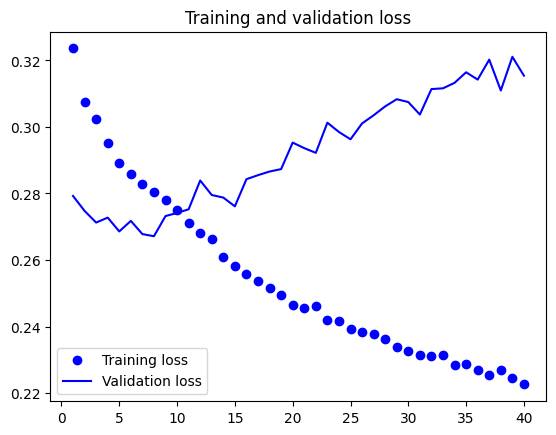

In [ ]:
# 그래프
import matplotlib.pyplot as plt

history = hist.history
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Dropout을 사용했으나 8번째 학습 이후 과대적합이 발생하기 시작한다. 또 지난번에 Dropout을 사용하지 않은 GRU layer로 학습을 진행했을 때보다 Validation loss가 더 줄어든 것도 아니다.

# 5. Stacking Recurrent Layer

Dropout을 사용하여 과대적합을 줄였으니 과대적합이 일어날 때까지 네트워크 용량을 늘리는 것이 좋다. 너무 많이 과대적합되지 않는 한 아직 충분한 용량에 도달한 것이 아니기 떄문이다.

네트워크 용량을 늘리기 위해선 일반적으로 layer의 유닛 수를 늘리거나 layer를 더 많이 추가한다.

**Keras에서는 layer를 제대로 쌓으려면 모든 중간층은 마지막 타임스텝만 출력하는 것이 아니라 전체 시퀀스(3D tensor)를 출력해야 한다. -> return_sequences=True**

In [ ]:
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import RMSprop

clear_session()
model = Sequential()
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True, input_shape=(None, float_data.shape[-1])))
model.add(GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
hist = model.fit_generator(train_gen, steps_per_epoch=500, epochs=10, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/10


<ipython-input-19-19a612aa7de9>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_gen, steps_per_epoch=500, epochs=10, validation_data=val_gen, validation_steps=val_steps)


500/500 [==============================] - 818s 2s/step - loss: 0.3237 - val_loss: 0.2871
Epoch 2/10
500/500 [==============================] - 839s 2s/step - loss: 0.3028 - val_loss: 0.2856
Epoch 3/10
500/500 [==============================] - 798s 2s/step - loss: 0.2980 - val_loss: 0.2695
Epoch 4/10
500/500 [==============================] - 785s 2s/step - loss: 0.2932 - val_loss: 0.2684
Epoch 5/10
500/500 [==============================] - 826s 2s/step - loss: 0.2879 - val_loss: 0.2741
Epoch 6/10
500/500 [==============================] - 780s 2s/step - loss: 0.2820 - val_loss: 0.2669
Epoch 7/10
500/500 [==============================] - 773s 2s/step - loss: 0.2773 - val_loss: 0.2678
Epoch 8/10
500/500 [==============================] - 773s 2s/step - loss: 0.2730 - val_loss: 0.2726
Epoch 9/10
500/500 [==============================] - 784s 2s/step - loss: 0.2691 - val_loss: 0.2911
Epoch 10/10
500/500 [==============================] - 775s 2s/step - loss: 0.2662 - val_loss: 0.2839


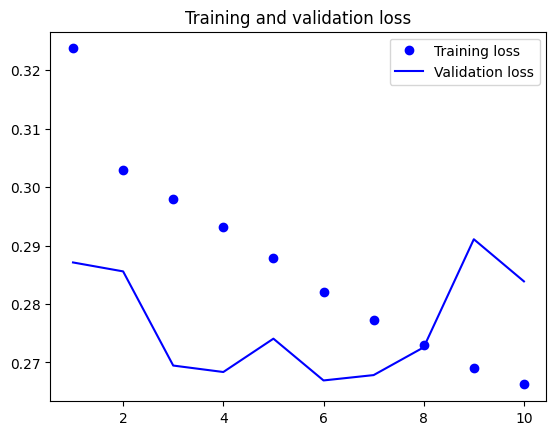

In [ ]:
# 그래프
import matplotlib.pyplot as plt

history = hist.history
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

GRU layer를 추가하여 성능을 높이고자 했으나 추가하지 않았을 때와 큰 차이는 없었다. 이 결론을 통해 생각할 수 있는 것은 비용은 더 들지만 validation_loss를 더 낮추기 위해 layer를 더 늘려 학습을 시도해보는 것과 GRU layer를 추가했지만 추가하지 않았을 때와 큰 차이가 없기 때문에 이 문제에 대해서는 네트워크의 용량을 늘리는 것이 성능을 높이는데 도움이 되지 않을 수도 있다는 것이다.